<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml07_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent(경사 하강법)

*   머신 러닝의 목적은 손실(비용) 함수를 최소로 만드는 모델 파라미터(w0, w1, ...)들을 찾는 것.
*   회귀 문제에서는 비용 함수는 MSE(w)
    *   w에 대한 2차 함수의 최솟값의 위치를 찾는 문제.
*   경사 하강법: 함수의 최솟값의 위치를 찾는 알고리즘의 하나.
    *   함수의 임의의 위치 w에서 시작.
    *   그 위치에서 접선의 기울기(gradient)를 계산.
    *   gradient의 절댓값이 줄어드는 방향으로 w 값을 약간 변경.
    *   위의 과정을 충분히 반복하면 함수가 최소가 되는 위치 w를 찾을 수 있음.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

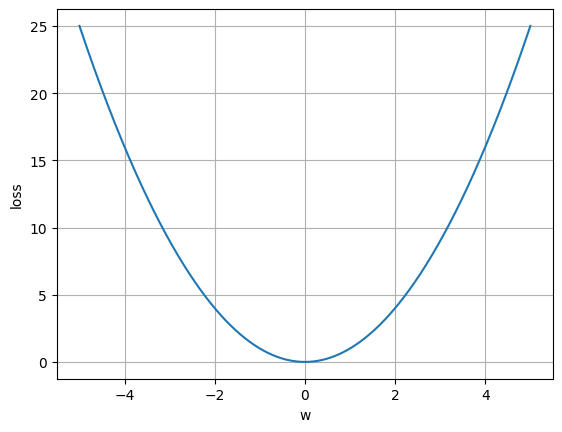

In [6]:
w = np.arange(-5, 5, 0.0001)
fn = w ** 2

plt.plot(w, fn)
plt.grid()
plt.xlabel('w')
plt.ylabel('loss')
plt.show()

In [10]:
# 임의의 w 위치를 선택
w_init = 4

# 선택한 위치(w_init)에서 함수의 접선의 기울기(gradient)를 계산
gradient = 2 * w_init

# 처음 위치에서 기울기의 반대 방향으로 약간 이동
w_next = w_init - gradient * 0.1

w_next

3.2

In [11]:
# 이동한 위치를 다시 시작.
w_init = w_next

# 다시 시작하는 위치에서 함수의 접선의 기울기를 계산
gradient = 2 * w_init

# 기울기의 반대 방향으로 약간 이동
w_next = w_init - gradient * 0.1

w_next

2.56